In [6]:
!pip install fredapi

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)

plt.style.use('fivethirtyeight')


In [7]:
from fredapi import Fred

In [14]:
fred_key = '6f9faea8cd151bbd459b1ceda6997fcb'

In [15]:
fred = Fred(api_key = fred_key)

#### Search for economic data 

In [21]:
SnP_data = fred.search('S&P', order_by = 'popularity')

In [22]:
SnP_data

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2023-09-24   2023-09-24   
CSUSHPINSA              CSUSHPINSA     2023-09-24   2023-09-24   
SP500                        SP500     2023-09-24   2023-09-24   
MEHOINUSA672N        MEHOINUSA672N     2023-09-24   2023-09-24   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2023-09-24   2023-09-24   
...                            ...            ...          ...   
DDEM01ILA156NWDB  DDEM01ILA156NWDB     2023-09-24   2023-09-24   
DDEM01JOA156NWDB  DDEM01JOA156NWDB     2023-09-24   2023-09-24   
DDEM01PGA156NWDB  DDEM01PGA156NWDB     2023-09-24   2023-09-24   
DDEM01QAA156NWDB  DDEM01QAA156NWDB     2023-09-24   2023-09-24   
DDEM01TTA156NWDB  DDEM01TTA156NWDB     2023-09-24   2023-09-24   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
DDEM01ILA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01JOA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01PGA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01QAA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   
DDEM01TTA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2023-09-21  Daily, Close   
CSUSHPINSA              1987-01-01      2023-06-01       Monthly   
SP500                   2013-09-23      2023-09-22  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2023-09-21  Daily, Close   
...                            ...             ...           ...   
DDEM01ILA156NWDB        1995-01-01      2020-01-01        Annual   
DDEM01JOA156NWDB        2007-01-01      2020-01-01        Annual   
DDEM01PGA156NWDB        2003-01-01      2017-01-01        Annual   
DDEM01QAA156NWDB        2007-01-01      2020-01-01        Annual   
DDEM01TTA156NWDB        2000-01-01      2001-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2021 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
DDEM01ILA156NWDB               A                         Percent   
DDEM01JOA156NWDB               A                         Percent   
DDEM01PGA156NWDB               A                         Percent   
DDEM01QAA156NWDB               A                         Percent   
DDEM01TTA156NWDB               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

In [19]:
SnP_data.shape

(1000, 15)

In [24]:
# Every row in the data is a series, now we are going to pull one row series out

sp500 = fred.get_series(series_id = 'SP500')

<AxesSubplot:title={'center':'S&P 500'}>

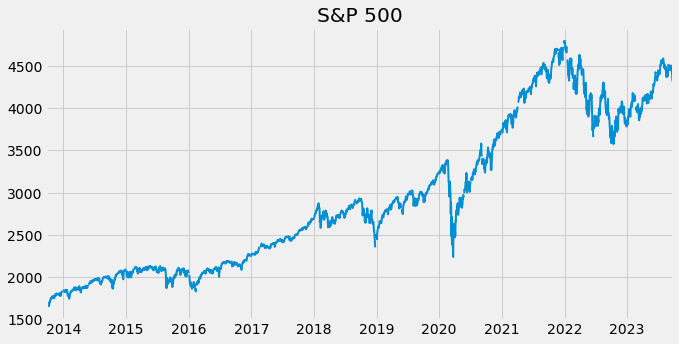

In [28]:
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 2)

#### Merging  series data together 

In [32]:
unemploy_result = fred.search('unemployment')

In [33]:
unemploy_result

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2023-09-24   2023-09-24   
UNRATENSA                          UNRATENSA     2023-09-24   2023-09-24   
UNEMPLOY                            UNEMPLOY     2023-09-24   2023-09-24   
CCSA                                    CCSA     2023-09-24   2023-09-24   
CCNSA                                  CCNSA     2023-09-24   2023-09-24   
...                                      ...            ...          ...   
LAUMT262242000000003A  LAUMT262242000000003A     2023-09-24   2023-09-24   
FLIN426UR                          FLIN426UR     2023-09-24   2023-09-24   
LRHUTTTTFIQ156S              LRHUTTTTFIQ156S     2023-09-24   2023-09-24   
LRHUTTTTFIA156N              LRHUTTTTFIA156N     2023-09-24   2023-09-24   
LRUN64TTHUA156N              LRUN64TTHUA156N     2023-09-24   2023-09-24   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
CCSA                             Continued Claims (Insured Unemployment)   
CCNSA                            Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUMT262242000000003A               Unemployment Rate in Flint, MI (MSA)   
FLIN426UR                           Unemployment Rate in Flint, MI (MSA)   
LRHUTTTTFIQ156S        Harmonized Unemployment: Monthly Rates: Total:...   
LRHUTTTTFIA156N        Harmonized Unemployment: Monthly Rates: Total:...   
LRUN64TTHUA156N        Unemployment Rate: Aged 15-64: All Persons for...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2023-08-01   
UNRATENSA                    1948-01-01      2023-08-01   
UNEMPLOY                     1948-01-01      2023-08-01   
CCSA                         1967-01-07      2023-09-09   
CCNSA                        1967-01-07      2023-09-09   
...                                 ...             ...   
LAUMT262242000000003A        1990-01-01      2022-01-01   
FLIN426UR                    1990-01-01      2023-07-01   
LRHUTTTTFIQ156S              1988-01-01      2023-04-01   
LRHUTTTTFIA156N              1988-01-01      2022-01-01   
LRUN64TTHUA156N              1999-01-01      2022-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
CCSA                   Weekly, Ending Saturday               W   
CCNSA                  Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUMT262242000000003A                   Annual               A   
FLIN426UR                              Monthly               M   
LRHUTTTTFIQ156S                      Quarterly               Q   
LRHUTTTTFIA156N                         Annual               A   
LRUN64TTHUA156N                         Annual               A   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
CCSA                                 Number             Number   
CCNSA                                Numb

In [34]:
unrate = fred.get_series('UNRATE')

In [35]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
Length: 908, dtype: float64

<AxesSubplot:title={'center':'Unemployment Rate'}>

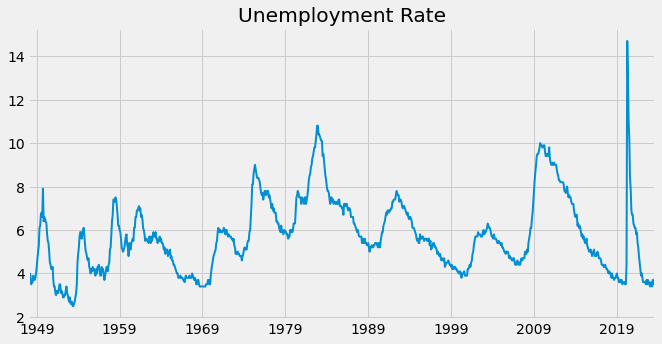

In [37]:
# Showing single series data - unemployment rate

unrate.plot(figsize = (10,5), title = 'Unemployment Rate', lw = 2)

In [209]:
unemployment_dataframe = fred.search('unemployment rate state' , filter = ('frequency' , 'Monthly'))

In [210]:
unemployment_dataframe

id realtime_start realtime_end  \
series id                                                                
UNRATE                              UNRATE     2023-09-24   2023-09-24   
UNRATENSA                        UNRATENSA     2023-09-24   2023-09-24   
UNEMPLOY                          UNEMPLOY     2023-09-24   2023-09-24   
LNS14000006                    LNS14000006     2023-09-24   2023-09-24   
LNU04000006                    LNU04000006     2023-09-24   2023-09-24   
U6RATE                              U6RATE     2023-09-24   2023-09-24   
U6RATENSA                        U6RATENSA     2023-09-24   2023-09-24   
CAUR                                  CAUR     2023-09-24   2023-09-24   
CAURN                                CAURN     2023-09-24   2023-09-24   
M0892AUSM156SNBR          M0892AUSM156SNBR     2023-09-24   2023-09-24   
M0892BUSM156SNBR          M0892BUSM156SNBR     2023-09-24   2023-09-24   
M0892CUSM156NNBR          M0892CUSM156NNBR     2023-09-24   2023-09-24   
LNS13026638                    LNS13026638     2023-09-24   2023-09-24   
UEMPMEAN                          UEMPMEAN     2023-09-24   2023-09-24   
TXUR                                  TXUR     2023-09-24   2023-09-24   
LNS14000031                    LNS14000031     2023-09-24   2023-09-24   
LNS14000002                    LNS14000002     2023-09-24   2023-09-24   
FLUR                                  FLUR     2023-09-24   2023-09-24   
NYUR                                  NYUR     2023-09-24   2023-09-24   
U2RATE                              U2RATE     2023-09-24   2023-09-24   
LNS14000024                    LNS14000024     2023-09-24   2023-09-24   
TXURN                                TXURN     2023-09-24   2023-09-24   
FLURN                                FLURN     2023-09-24   2023-09-24   
NYURN                                NYURN     2023-09-24   2023-09-24   
LNU04000031                    LNU04000031     2023-09-24   2023-09-24   
LNU04000002                    LNU04000002     2023-09-24   2023-09-24   
LNU04000024                    LNU04000024     2023-09-24   2023-09-24   
U2RATENSA                        U2RATENSA     2023-09-24   2023-09-24   
LNS14000009                    LNS14000009     2023-09-24   2023-09-24   
LNU04000009                    LNU04000009     2023-09-24   2023-09-24   
CGBD2534                          CGBD2534     2023-09-24   2023-09-24   
UEMP27OV                          UEMP27OV     2023-09-24   2023-09-24   
CALOSA7URN                      CALOSA7URN     2023-09-24   2023-09-24   
LNS14000003                    LNS14000003     2023-09-24   2023-09-24   
LNU04032231                    LNU04032231     2023-09-24   2023-09-24   
LNU04000003                    LNU04000003     2023-09-24   2023-09-24   
OHUR                                  OHUR     2023-09-24   2023-09-24   
LNS14024887                    LNS14024887     2023-09-24   2023-09-24   
LNS13000001                    LNS13000001     2023-09-24   2023-09-24   
LNU04024887                    LNU04024887     2023-09-24   2023-09-24   
OHURN                                OHURN     2023-09-24   2023-09-24   
LNS14000001                    LNS14000001     2023-09-24   2023-09-24   
MIUR                                  MIUR     2023-09-24   2023-09-24   
LNS13000002                    LNS13000002     2023-09-24   2023-09-24   
FLMIAM6URN                      FLMIAM6URN     2023-09-24   2023-09-24   
ALUR                                  ALUR     2023-09-24   2023-09-24   
MIURN                                MIURN     2023-09-24   2023-09-24   
U4RATE                              U4RATE     2023-09-24   2023-09-24   
LNU04000001                    LNU04000001     2023-09-24   2023-09-24   
U4RATENSA                        U4RATENSA     2023-09-24   2023-09-24   
UEMPMED                            UEMPMED     2023-09-24   2023-09-24   
U1RATE                              U1RATE     2023-09-24   2023-09-24   
ALURN                                ALURN  

In [211]:
unemployment_dataframe = unemployment_dataframe.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [212]:
unemployment_dataframe

id realtime_start realtime_end  \
series id                                                                
UNRATE                              UNRATE     2023-09-24   2023-09-24   
LNS14000006                    LNS14000006     2023-09-24   2023-09-24   
U6RATE                              U6RATE     2023-09-24   2023-09-24   
CAUR                                  CAUR     2023-09-24   2023-09-24   
M0892AUSM156SNBR          M0892AUSM156SNBR     2023-09-24   2023-09-24   
M0892BUSM156SNBR          M0892BUSM156SNBR     2023-09-24   2023-09-24   
TXUR                                  TXUR     2023-09-24   2023-09-24   
LNS14000031                    LNS14000031     2023-09-24   2023-09-24   
LNS14000002                    LNS14000002     2023-09-24   2023-09-24   
FLUR                                  FLUR     2023-09-24   2023-09-24   
NYUR                                  NYUR     2023-09-24   2023-09-24   
U2RATE                              U2RATE     2023-09-24   2023-09-24   
LNS14000024                    LNS14000024     2023-09-24   2023-09-24   
LNS14000009                    LNS14000009     2023-09-24   2023-09-24   
LNS14000003                    LNS14000003     2023-09-24   2023-09-24   
OHUR                                  OHUR     2023-09-24   2023-09-24   
LNS14024887                    LNS14024887     2023-09-24   2023-09-24   
LNS14000001                    LNS14000001     2023-09-24   2023-09-24   
MIUR                                  MIUR     2023-09-24   2023-09-24   
ALUR                                  ALUR     2023-09-24   2023-09-24   
U4RATE                              U4RATE     2023-09-24   2023-09-24   
U1RATE                              U1RATE     2023-09-24   2023-09-24   
ILUR                                  ILUR     2023-09-24   2023-09-24   
NJUR                                  NJUR     2023-09-24   2023-09-24   
COUR                                  COUR     2023-09-24   2023-09-24   
PAUR                                  PAUR     2023-09-24   2023-09-24   
LNS14027662                    LNS14027662     2023-09-24   2023-09-24   
NMUR                                  NMUR     2023-09-24   2023-09-24   
MAUR                                  MAUR     2023-09-24   2023-09-24   
MNUR                                  MNUR     2023-09-24   2023-09-24   
TNUR                                  TNUR     2023-09-24   2023-09-24   
LNS14027660                    LNS14027660     2023-09-24   2023-09-24   
NCUR                                  NCUR     2023-09-24   2023-09-24   
LNS14032183                    LNS14032183     2023-09-24   2023-09-24   
WIUR                                  WIUR     2023-09-24   2023-09-24   
MDUR                                  MDUR     2023-09-24   2023-09-24   
KYUR                                  KYUR     2023-09-24   2023-09-24   
SCUR                                  SCUR     2023-09-24   2023-09-24   
VAUR                                  VAUR     2023-09-24   2023-09-24   
LRUN64TTUSM156S            LRUN64TTUSM156S     2023-09-24   2023-09-24   
ARUR                                  ARUR     2023-09-24   2023-09-24   
ORUR                                  ORUR     2023-09-24   2023-09-24   
GAUR                                  GAUR     2023-09-24   2023-09-24   
AZUR                                  AZUR     2023-09-24   2023-09-24   
LBSSA06                            LBSSA06     2023-09-24   2023-09-24   
LBSSA01                            LBSSA01     2023-09-24   2023-09-24   
LNS14000018                    LNS14000018     2023-09-24   2023-09-24   
LNS14000012                    LNS14000012     2023-09-24   2023-09-24   
LBSSA21                            LBSSA21     2023-09-24   2023-09-24   
WAUR                                  WAUR     2023-09-24   2023-09-24   
INUR                                  INUR     2023-09-24   2023-09-24   
IAUR                                  IAUR     2023-09-24   2023-09-24   
MOUR                                  MOUR  

In [213]:
# Searh for series that are related to unemployment 

unemployment_dataframe = unemployment_dataframe.loc[unemployment_dataframe['title'].str.contains('Unemployment Rate')]

In [214]:
unemployment_dataframe

id realtime_start realtime_end  \
series id                                                                
UNRATE                              UNRATE     2023-09-24   2023-09-24   
LNS14000006                    LNS14000006     2023-09-24   2023-09-24   
CAUR                                  CAUR     2023-09-24   2023-09-24   
M0892AUSM156SNBR          M0892AUSM156SNBR     2023-09-24   2023-09-24   
M0892BUSM156SNBR          M0892BUSM156SNBR     2023-09-24   2023-09-24   
TXUR                                  TXUR     2023-09-24   2023-09-24   
LNS14000031                    LNS14000031     2023-09-24   2023-09-24   
LNS14000002                    LNS14000002     2023-09-24   2023-09-24   
FLUR                                  FLUR     2023-09-24   2023-09-24   
NYUR                                  NYUR     2023-09-24   2023-09-24   
U2RATE                              U2RATE     2023-09-24   2023-09-24   
LNS14000024                    LNS14000024     2023-09-24   2023-09-24   
LNS14000009                    LNS14000009     2023-09-24   2023-09-24   
LNS14000003                    LNS14000003     2023-09-24   2023-09-24   
OHUR                                  OHUR     2023-09-24   2023-09-24   
LNS14024887                    LNS14024887     2023-09-24   2023-09-24   
LNS14000001                    LNS14000001     2023-09-24   2023-09-24   
MIUR                                  MIUR     2023-09-24   2023-09-24   
ALUR                                  ALUR     2023-09-24   2023-09-24   
ILUR                                  ILUR     2023-09-24   2023-09-24   
NJUR                                  NJUR     2023-09-24   2023-09-24   
COUR                                  COUR     2023-09-24   2023-09-24   
PAUR                                  PAUR     2023-09-24   2023-09-24   
LNS14027662                    LNS14027662     2023-09-24   2023-09-24   
NMUR                                  NMUR     2023-09-24   2023-09-24   
MAUR                                  MAUR     2023-09-24   2023-09-24   
MNUR                                  MNUR     2023-09-24   2023-09-24   
TNUR                                  TNUR     2023-09-24   2023-09-24   
LNS14027660                    LNS14027660     2023-09-24   2023-09-24   
NCUR                                  NCUR     2023-09-24   2023-09-24   
LNS14032183                    LNS14032183     2023-09-24   2023-09-24   
WIUR                                  WIUR     2023-09-24   2023-09-24   
MDUR                                  MDUR     2023-09-24   2023-09-24   
KYUR                                  KYUR     2023-09-24   2023-09-24   
SCUR                                  SCUR     2023-09-24   2023-09-24   
VAUR                                  VAUR     2023-09-24   2023-09-24   
LRUN64TTUSM156S            LRUN64TTUSM156S     2023-09-24   2023-09-24   
ARUR                                  ARUR     2023-09-24   2023-09-24   
ORUR                                  ORUR     2023-09-24   2023-09-24   
GAUR                                  GAUR     2023-09-24   2023-09-24   
AZUR                                  AZUR     2023-09-24   2023-09-24   
LNS14000018                    LNS14000018     2023-09-24   2023-09-24   
LNS14000012                    LNS14000012     2023-09-24   2023-09-24   
WAUR                                  WAUR     2023-09-24   2023-09-24   
INUR                                  INUR     2023-09-24   2023-09-24   
IAUR                                  IAUR     2023-09-24   2023-09-24   
MOUR                                  MOUR     2023-09-24   2023-09-24   
LNS14027659                    LNS14027659     2023-09-24   2023-09-24   
UTUR                                  UTUR     2023-09-24   2023-09-24   
LNS14000060                    LNS14000060     2023-09-24   2023-09-24   
LASMT261982000000003  LASMT261982000000003     2023-09-24   2023-09-24   
WVUR                                  WVUR     2023-09-24   2023-09-24   
NVUR                                  NVUR  

In [215]:
unemployment_dataframe.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'LNS14000031', 'LNS14000002', 'FLUR', 'NYUR', 'U2RATE',
       'LNS14000024', 'LNS14000009', 'LNS14000003', 'OHUR', 'LNS14024887',
       'LNS14000001', 'MIUR', 'ALUR', 'ILUR', 'NJUR', 'COUR', 'PAUR',
       'LNS14027662', 'NMUR', 'MAUR', 'MNUR', 'TNUR', 'LNS14027660', 'NCUR',
       'LNS14032183', 'WIUR', 'MDUR', 'KYUR', 'SCUR', 'VAUR',
       'LRUN64TTUSM156S', 'ARUR', 'ORUR', 'GAUR', 'AZUR', 'LNS14000018',
       'LNS14000012', 'WAUR', 'INUR', 'IAUR', 'MOUR', 'LNS14027659', 'UTUR',
       'LNS14000060', 'LASMT261982000000003', 'WVUR', 'NVUR', 'MSUR', 'LAUR',
       'CTUR', 'OKUR', 'NDUR', 'DCUR', 'MEUR', 'HIUR', 'KSUR', 'NEUR', 'PRUR',
       'LNS14000036', 'AKUR', 'MTUR', 'IDUR', 'SDUR', 'LNS14000032', 'DEUR',
       'RIUR', 'NHUR', 'LASMT391746000000003', 'LNS14000089', 'LNS14024230',
       'WYUR', 'LNS14000028', 'CMWRUR', 'VTUR', 'LNS14000026',
       'LRUN24TTUSM156S', 'LNS14000025', 

In [216]:
# Filter up the data into just US' s State unemplotment rate data

non_state_index = [index for index in unemployment_dataframe.index \
                   if index.startswith('LNS')\
                   or index.startswith('LAS')\
                   or index.startswith('M0')or\
                   index.startswith('LR') or \
                   index.startswith('USAURAMS')or\
                   index.startswith('U2RATE') or
                   index.startswith('CMWRUR')
                  ]


unemployment_dataframe = unemployment_dataframe.drop(index = non_state_index)

unemployment_dataframe



id realtime_start realtime_end  \
series id                                       
UNRATE     UNRATE     2023-09-24   2023-09-24   
CAUR         CAUR     2023-09-24   2023-09-24   
TXUR         TXUR     2023-09-24   2023-09-24   
FLUR         FLUR     2023-09-24   2023-09-24   
NYUR         NYUR     2023-09-24   2023-09-24   
OHUR         OHUR     2023-09-24   2023-09-24   
MIUR         MIUR     2023-09-24   2023-09-24   
ALUR         ALUR     2023-09-24   2023-09-24   
ILUR         ILUR     2023-09-24   2023-09-24   
NJUR         NJUR     2023-09-24   2023-09-24   
COUR         COUR     2023-09-24   2023-09-24   
PAUR         PAUR     2023-09-24   2023-09-24   
NMUR         NMUR     2023-09-24   2023-09-24   
MAUR         MAUR     2023-09-24   2023-09-24   
MNUR         MNUR     2023-09-24   2023-09-24   
TNUR         TNUR     2023-09-24   2023-09-24   
NCUR         NCUR     2023-09-24   2023-09-24   
WIUR         WIUR     2023-09-24   2023-09-24   
MDUR         MDUR     2023-09-24   2023-09-24   
KYUR         KYUR     2023-09-24   2023-09-24   
SCUR         SCUR     2023-09-24   2023-09-24   
VAUR         VAUR     2023-09-24   2023-09-24   
ARUR         ARUR     2023-09-24   2023-09-24   
ORUR         ORUR     2023-09-24   2023-09-24   
GAUR         GAUR     2023-09-24   2023-09-24   
AZUR         AZUR     2023-09-24   2023-09-24   
WAUR         WAUR     2023-09-24   2023-09-24   
INUR         INUR     2023-09-24   2023-09-24   
IAUR         IAUR     2023-09-24   2023-09-24   
MOUR         MOUR     2023-09-24   2023-09-24   
UTUR         UTUR     2023-09-24   2023-09-24   
WVUR         WVUR     2023-09-24   2023-09-24   
NVUR         NVUR     2023-09-24   2023-09-24   
MSUR         MSUR     2023-09-24   2023-09-24   
LAUR         LAUR     2023-09-24   2023-09-24   
CTUR         CTUR     2023-09-24   2023-09-24   
OKUR         OKUR     2023-09-24   2023-09-24   
NDUR         NDUR     2023-09-24   2023-09-24   
DCUR         DCUR     2023-09-24   2023-09-24   
MEUR         MEUR     2023-09-24   2023-09-24   
HIUR         HIUR     2023-09-24   2023-09-24   
KSUR         KSUR     2023-09-24   2023-09-24   
NEUR         NEUR     2023-09-24   2023-09-24   
PRUR         PRUR     2023-09-24   2023-09-24   
AKUR         AKUR     2023-09-24   2023-09-24   
MTUR         MTUR     2023-09-24   2023-09-24   
IDUR         IDUR     2023-09-24   2023-09-24   
SDUR         SDUR     2023-09-24   2023-09-24   
DEUR         DEUR     2023-09-24   2023-09-24   
RIUR         RIUR     2023-09-24   2023-09-24   
NHUR         NHUR     2023-09-24   2023-09-24   
WYUR         WYUR     2023-09-24   2023-09-24   
VTUR         VTUR     2023-09-24   2023-09-24   
CSOUUR     CSOUUR     2023-09-24   2023-09-24   
CENCUR     CENCUR     2023-09-24   2023-09-24   
CNEWUR     CNEWUR     2023-09-24   2023-09-24   
CWSTUR     CWSTUR     2023-09-24   2023-09-24   
CNERUR     CNERUR     2023-09-24   2023-09-24   

                                                       title  \
series id                                                      
UNRATE                                     Unemployment Rate   
CAUR                         Unemployment Rate in California   
TXUR                              Unemployment Rate in Texas   
FLUR                            Unemployment Rate in Florida   
NYUR                           Unemployment Rate in New York   
OHUR                               Unemployment Rate in Ohio   
MIUR                           Unemployment Rate in Michigan   
ALUR                            Unemployment Rate in Alabama   
ILUR                           Unemployment Rate in Illinois   
NJUR                         Unemployment Rate in New Jersey   
COUR                           Unemployment Rate in Colorado   
PAUR                       Unemployment Rate in Pennsylvania   
NMUR                         Unemployment Rate in New Mexico   
MAUR                      Unemployment Rate in Massachusetts   
MNUR                          Unemployment Rate in

In [217]:
unemployment_dataframe = unemployment_dataframe.iloc[:-5, :]

In [218]:
unemployment_dataframe

id realtime_start realtime_end  \
series id                                       
UNRATE     UNRATE     2023-09-24   2023-09-24   
CAUR         CAUR     2023-09-24   2023-09-24   
TXUR         TXUR     2023-09-24   2023-09-24   
FLUR         FLUR     2023-09-24   2023-09-24   
NYUR         NYUR     2023-09-24   2023-09-24   
OHUR         OHUR     2023-09-24   2023-09-24   
MIUR         MIUR     2023-09-24   2023-09-24   
ALUR         ALUR     2023-09-24   2023-09-24   
ILUR         ILUR     2023-09-24   2023-09-24   
NJUR         NJUR     2023-09-24   2023-09-24   
COUR         COUR     2023-09-24   2023-09-24   
PAUR         PAUR     2023-09-24   2023-09-24   
NMUR         NMUR     2023-09-24   2023-09-24   
MAUR         MAUR     2023-09-24   2023-09-24   
MNUR         MNUR     2023-09-24   2023-09-24   
TNUR         TNUR     2023-09-24   2023-09-24   
NCUR         NCUR     2023-09-24   2023-09-24   
WIUR         WIUR     2023-09-24   2023-09-24   
MDUR         MDUR     2023-09-24   2023-09-24   
KYUR         KYUR     2023-09-24   2023-09-24   
SCUR         SCUR     2023-09-24   2023-09-24   
VAUR         VAUR     2023-09-24   2023-09-24   
ARUR         ARUR     2023-09-24   2023-09-24   
ORUR         ORUR     2023-09-24   2023-09-24   
GAUR         GAUR     2023-09-24   2023-09-24   
AZUR         AZUR     2023-09-24   2023-09-24   
WAUR         WAUR     2023-09-24   2023-09-24   
INUR         INUR     2023-09-24   2023-09-24   
IAUR         IAUR     2023-09-24   2023-09-24   
MOUR         MOUR     2023-09-24   2023-09-24   
UTUR         UTUR     2023-09-24   2023-09-24   
WVUR         WVUR     2023-09-24   2023-09-24   
NVUR         NVUR     2023-09-24   2023-09-24   
MSUR         MSUR     2023-09-24   2023-09-24   
LAUR         LAUR     2023-09-24   2023-09-24   
CTUR         CTUR     2023-09-24   2023-09-24   
OKUR         OKUR     2023-09-24   2023-09-24   
NDUR         NDUR     2023-09-24   2023-09-24   
DCUR         DCUR     2023-09-24   2023-09-24   
MEUR         MEUR     2023-09-24   2023-09-24   
HIUR         HIUR     2023-09-24   2023-09-24   
KSUR         KSUR     2023-09-24   2023-09-24   
NEUR         NEUR     2023-09-24   2023-09-24   
PRUR         PRUR     2023-09-24   2023-09-24   
AKUR         AKUR     2023-09-24   2023-09-24   
MTUR         MTUR     2023-09-24   2023-09-24   
IDUR         IDUR     2023-09-24   2023-09-24   
SDUR         SDUR     2023-09-24   2023-09-24   
DEUR         DEUR     2023-09-24   2023-09-24   
RIUR         RIUR     2023-09-24   2023-09-24   
NHUR         NHUR     2023-09-24   2023-09-24   
WYUR         WYUR     2023-09-24   2023-09-24   
VTUR         VTUR     2023-09-24   2023-09-24   

                                                   title observation_start  \
series id                                                                    
UNRATE                                 Unemployment Rate        1948-01-01   
CAUR                     Unemployment Rate in California        1976-01-01   
TXUR                          Unemployment Rate in Texas        1976-01-01   
FLUR                        Unemployment Rate in Florida        1976-01-01   
NYUR                       Unemployment Rate in New York        1976-01-01   
OHUR                           Unemployment Rate in Ohio        1976-01-01   
MIUR                       Unemployment Rate in Michigan        1976-01-01   
ALUR                        Unemployment Rate in Alabama        1976-01-01   
ILUR                       Unemployment Rate in Illinois        1976-01-01   
NJUR                     Unemployment Rate in New Jersey        1976-01-01   
COUR                       Unemployment Rate in Colorado        1976-01-01   
PAUR                   Unemployment Rate in Pennsylvania        1976-01-01   
NMUR                     Unemployment Rate in New Mexico        1976-01-01   
MAUR                  Unemployment Rate in Massachusetts        1976-01-01   
MNUR                      Unemployment Rate in Minnesota        1976-01

In [219]:
all_unemploy_result = []

for id in unemployment_dataframe.index:
    results = fred.get_series(id)
    results = results.to_frame(name = id)
    all_unemploy_result.append(results)


In [220]:
# Merging multiples data series into a pandas data frame 

pd.set_option('display.max_rows', None)
unemo_result = pd.concat(all_unemploy_result, axis = 1)

In [221]:
unemo_result

UNRATE  CAUR  TXUR  FLUR  NYUR  OHUR  MIUR  ALUR  ILUR  NJUR  \
1948-01-01     3.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-02-01     3.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-03-01     4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-04-01     3.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-05-01     3.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-06-01     3.6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-07-01     3.6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-08-01     3.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-09-01     3.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-10-01     3.7   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-11-01     3.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1948-12-01     4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-01-01     4.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-02-01     4.7   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-03-01     5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-04-01     5.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-05-01     6.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-06-01     6.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-07-01     6.7   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-08-01     6.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-09-01     6.6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-10-01     7.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-11-01     6.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1949-12-01     6.6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-01-01     6.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-02-01     6.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-03-01     6.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-04-01     5.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-05-01     5.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-06-01     5.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-07-01     5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-08-01     4.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-09-01     4.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-10-01     4.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-11-01     4.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1950-12-01     4.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-01-01     3.7   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-02-01     3.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-03-01     3.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-04-01     3.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-05-01     3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-06-01     3.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-07-01     3.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-08-01     3.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-09-01     3.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-10-01     3.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-11-01     3.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-12-01     3.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1952-01-01     3.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1952-02-01     3.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1952-03-01     2.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1952-04-01     2.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [222]:
unemo_result = unemo_result.drop('UNRATE', axis = 1)

<AxesSubplot:>

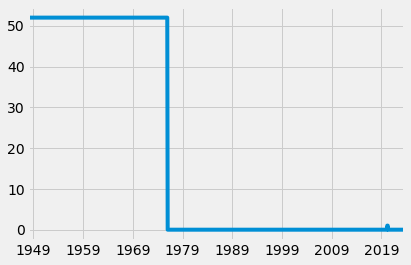

In [223]:
# Find out which year are having null data 

unemo_result.isna().sum(axis = 1).plot()

In [224]:
# Drop all the values before 1976

unemo_result = unemo_result.dropna()
is_to_state = unemployment_dataframe['title'].str.replace('Unemployment Rate in', ' ').to_dict()
unemo_result.columns = [is_to_state[c] for c in unemo_result.columns]

In [225]:
# Show the unemployment rate of each state in an interactive chart 

px.line(unemo_result)

#### Pull May 2020 Unemployment Rate per State

In [226]:
May_2020 = unemo_result.loc[unemo_result.index == '2020-05-01'].T

[]

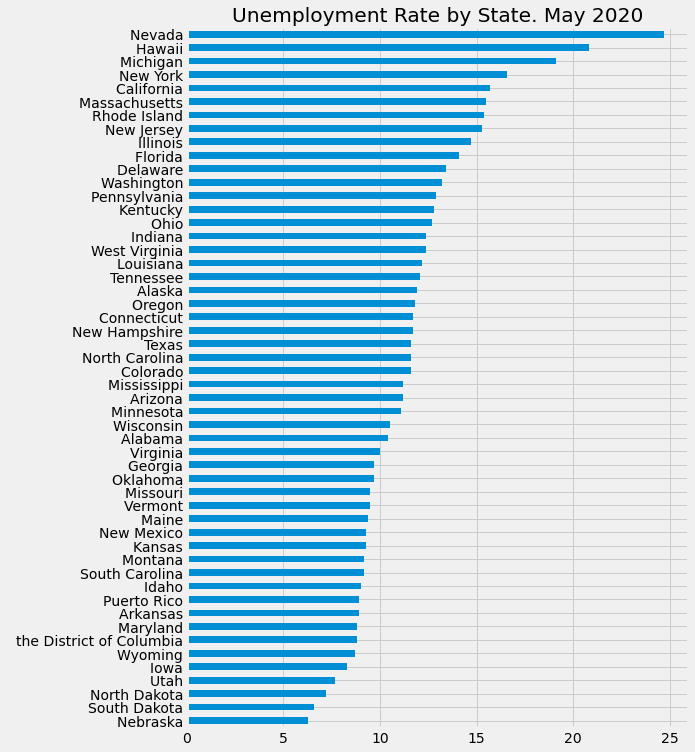

In [231]:
ax = May_2020.sort_values('2020-05-01').plot(kind = 'barh', figsize = (8, 12), width = 0.5\
                                       , title = 'Unemployment Rate by State. May 2020')

ax.legend().remove()
ax.plot

plt.plot()